In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [6]:
# Import the dependency requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | rocha
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | gwadar
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | chicama
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | aptos
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | tanza
Processing Record 18 of Set 1 | saleaula
City not found. Skipping...
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | forestville
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1 | but

Processing Record 38 of Set 4 | taltal
Processing Record 39 of Set 4 | amapa
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | argentan
Processing Record 44 of Set 4 | mayor pablo lagerenza
Processing Record 45 of Set 4 | ratnagiri
Processing Record 46 of Set 4 | tarko-sale
Processing Record 47 of Set 4 | yeniseysk
Processing Record 48 of Set 4 | mbandaka
Processing Record 49 of Set 4 | sangar
Processing Record 50 of Set 4 | lasa
Processing Record 1 of Set 5 | coihaique
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | yialos
City not found. Skipping...
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | kerteh
City not found. Skipping...
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | avera
Processing Record 9 of Set 5 | sitka
Processing Record 10 of Set 5 | torbay


Processing Record 29 of Set 8 | broome
Processing Record 30 of Set 8 | kishanganj
Processing Record 31 of Set 8 | montrose
Processing Record 32 of Set 8 | khorol
Processing Record 33 of Set 8 | qasigiannguit
Processing Record 34 of Set 8 | lufilufi
Processing Record 35 of Set 8 | selma
Processing Record 36 of Set 8 | san quintin
Processing Record 37 of Set 8 | lazaro cardenas
Processing Record 38 of Set 8 | edson
Processing Record 39 of Set 8 | pisco
Processing Record 40 of Set 8 | raurkela
City not found. Skipping...
Processing Record 41 of Set 8 | nefteyugansk
Processing Record 42 of Set 8 | bejar
Processing Record 43 of Set 8 | yining
Processing Record 44 of Set 8 | bene ayish
Processing Record 45 of Set 8 | puerto baquerizo moreno
Processing Record 46 of Set 8 | westport
Processing Record 47 of Set 8 | lolua
City not found. Skipping...
Processing Record 48 of Set 8 | cochrane
Processing Record 49 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 50 of Set 8 | turukh

Processing Record 14 of Set 12 | hofn
Processing Record 15 of Set 12 | rostovka
Processing Record 16 of Set 12 | boa vista
Processing Record 17 of Set 12 | gizo
Processing Record 18 of Set 12 | outjo
Processing Record 19 of Set 12 | mahanoro
Processing Record 20 of Set 12 | kavaratti
Processing Record 21 of Set 12 | tambovka
Processing Record 22 of Set 12 | mnogovershinnyy
Processing Record 23 of Set 12 | tres arroyos
Processing Record 24 of Set 12 | amuntai
Processing Record 25 of Set 12 | preobrazheniye
Processing Record 26 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 27 of Set 12 | svetlaya
Processing Record 28 of Set 12 | winslow
Processing Record 29 of Set 12 | ekibastuz
Processing Record 30 of Set 12 | tatarbunary
Processing Record 31 of Set 12 | port moresby
Processing Record 32 of Set 12 | korem
Processing Record 33 of Set 12 | aripuana
Processing Record 34 of Set 12 | tecoanapa
Processing Record 35 of Set 12 | saint-pierre
Processing Record 36 of Set

In [10]:
# Tally the number of cities.
len(city_data)

555

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,46.09,90,90,30.27,AU,2021-07-31 22:04:16
1,Mataura,-46.1927,168.8643,48.47,100,100,1.97,NZ,2021-07-31 22:04:16
2,Hobart,-42.8794,147.3294,46.26,70,40,7.00,AU,2021-07-31 22:00:10
3,Hermanus,-34.4187,19.2345,54.90,87,100,5.14,ZA,2021-07-31 21:59:52
4,Vaini,-21.2000,-175.2000,73.62,75,100,25.19,TO,2021-07-31 22:00:18


In [12]:
# Reorder the columns so they are easier to read. 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city data df the new column order.
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-07-31 22:04:16,-33.6500,115.3333,46.09,90,90,30.27
1,Mataura,NZ,2021-07-31 22:04:16,-46.1927,168.8643,48.47,100,100,1.97
2,Hobart,AU,2021-07-31 22:00:10,-42.8794,147.3294,46.26,70,40,7.00
3,Hermanus,ZA,2021-07-31 21:59:52,-34.4187,19.2345,54.90,87,100,5.14
4,Vaini,TO,2021-07-31 22:00:18,-21.2000,-175.2000,73.62,75,100,25.19


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

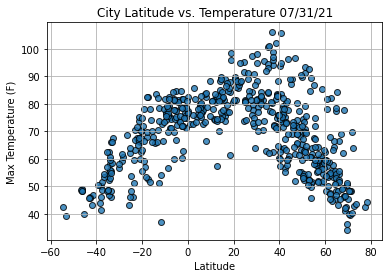

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

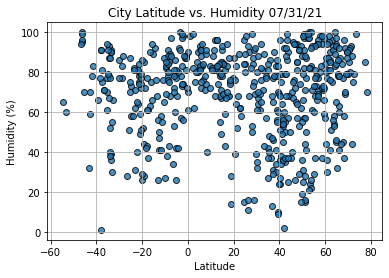

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

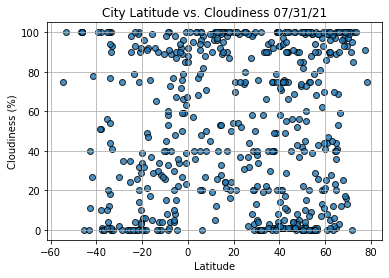

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

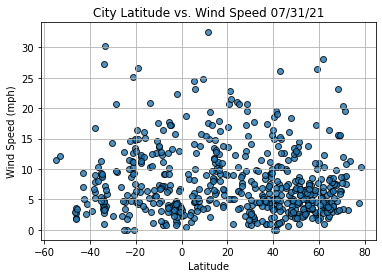

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Get a specific row from our city data df. 
index13 = city_data_df.loc[13]

In [22]:
index13

City                        Aptos
Country                        US
Date          2021-07-31 22:04:20
Lat                       36.9772
Lng                     -121.8994
Max Temp                     94.3
Humidity                       65
Cloudiness                     75
Wind Speed                   1.01
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [24]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
7,Gwadar,PK,2021-07-31 22:00:25,25.1216,62.3254,81.55,84,80,6.44
11,Nome,US,2021-07-31 22:02:39,64.5011,-165.4064,48.16,94,100,16.35
13,Aptos,US,2021-07-31 22:04:20,36.9772,-121.8994,94.30,65,75,1.01
14,Albany,US,2021-07-31 22:00:11,42.6001,-73.9662,73.15,50,49,7.47
16,Tanza,PH,2021-07-31 22:04:20,14.6753,120.9389,82.18,84,100,11.01


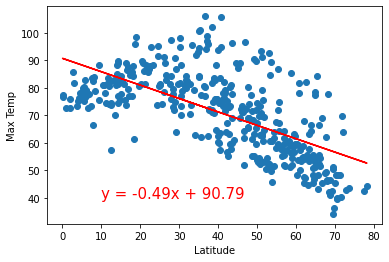

In [25]:
# Perform linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [26]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-07-31 22:04:16,-33.6500,115.3333,46.09,90,90,30.27
1,Mataura,NZ,2021-07-31 22:04:16,-46.1927,168.8643,48.47,100,100,1.97
2,Hobart,AU,2021-07-31 22:00:10,-42.8794,147.3294,46.26,70,40,7.00
3,Hermanus,ZA,2021-07-31 21:59:52,-34.4187,19.2345,54.90,87,100,5.14
4,Vaini,TO,2021-07-31 22:00:18,-21.2000,-175.2000,73.62,75,100,25.19


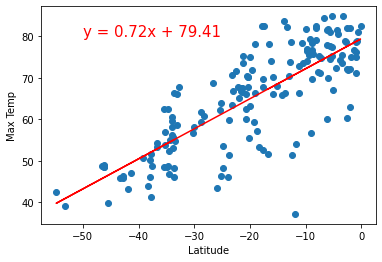

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80)) 

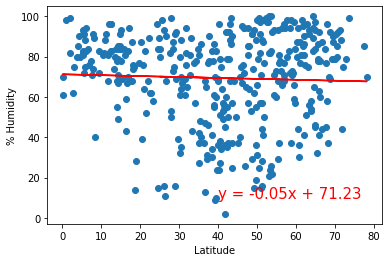

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

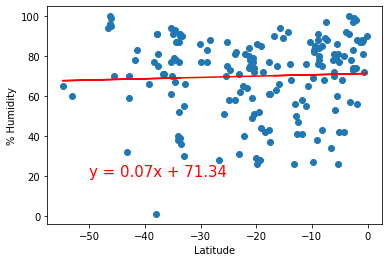

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for % Humidity', '% Humidity',(-50,20))

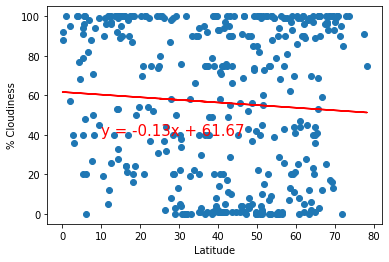

In [30]:
# Perform linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', '% Cloudiness',(10,40))

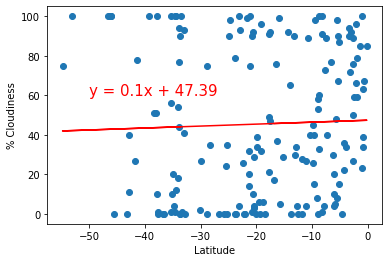

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for % Cloudiness', '% Cloudiness',(-50,60))

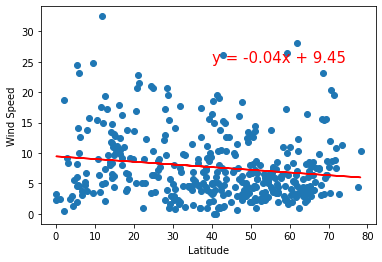

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Wind Speed', 'Wind Speed',(40,25))

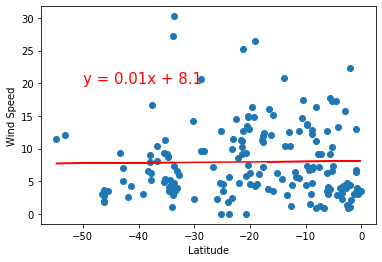

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))